In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy   import   stats

### Read CSV

In [2]:
filename = "data_challenge.csv"

### Transform columns of dataset in readable format by replacing space with underscore

In [3]:
df = pd.read_csv(filename,header=1)
df.columns = [c.replace(' ', '_') for c in df.columns]
df[["Injury_Month", "Injury_Day", "Injury_Year"]] = df["Injury_Date"].str.split("/", expand = True)

# DATA CLEANING

## Cleaning Claim Number - Making it unique

### Step1)To give Claim Number Column a unique number, rows having same claim number were transformed and an additional number '.2' was added at the end of the it. 

In [5]:
#Uniquifying claim numbers
unique_df = df.drop_duplicates(subset="Claim_Number",keep="first")
dup_last = df[df.duplicated(subset="Claim_Number",keep="last")]
dup_last.loc[:,"Claim_Number"] = dup_last.loc[:,"Claim_Number"] + ".2"
unique_df = pd.concat([unique_df,dup_last],ignore_index=True)
unique_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Claim_Number,Claim_Cost,Injury_Cause_(injuries),Gender,Injured_Worker_Age,Injured_Worker_Experience,Injury_Date,Injured_Work_Job_Group,Injury_Month,Injury_Day,Injury_Year
0,ClaimNumber9999,473.76,Strain,M,41,0,10/28/19,FOOD SERVICE,10,28,19
1,ClaimNumber9998,312.3,Burn,M,38,5,4/27/18,FOOD SERVICE,4,27,18
2,ClaimNumber9996,2294.99,Injury Caused by Person(s),F,44,2,9/19/19,PROFESSIONAL/CLERICAL/ADMIN,9,19,19
3,ClaimNumber9993,0,Fall/Slip,M,60,10,10/24/19,BUILDING MAINTENANCE,10,24,19
4,ClaimNumber999,0,Misc,F,62,0,6/6/19,FOOD SERVICE,6,6,19
...,...,...,...,...,...,...,...,...,...,...,...
14067,ClaimNumber10159.2,129,Misc,M,43,2,4/22/19,PROFESSIONAL/CLERICAL/ADMIN,4,22,19
14068,ClaimNumber10125.2,331.48,Struck,M,56,1,1/8/19,PROFESSIONAL/CLERICAL/ADMIN,1,8,19
14069,ClaimNumber10117.2,5105.99,Misc,F,45,10,4/26/19,PROFESSIONAL/CLERICAL/ADMIN,4,26,19
14070,ClaimNumber10091.2,957.44,Fall/Slip,F,44,1,6/1/18,PROFESSIONAL/CLERICAL/ADMIN,6,1,18


## Cleaning Claim cost

### Step1)Converted column to numeric data and dropped a row with irrelevant data
### Step2)Putting limit on outliers by using a fixed limit value 1e+06
### Step3)Imputing non numeric entries with mean excluding outliers
### Step4)Plot Claim Cost to visualize median is greater than mean

In [6]:
claimcost = pd.to_numeric(unique_df['Claim_Cost'],errors='coerce').dropna().sort_values()

In [7]:
#The outliers are 10 billion and 100 billion
#Rest of the claim costs are less than 1e+06 (1 million)
#Setting outlier limit to 1 million

OUTLIER_LIMIT = 1e+06 

#Calculating mean excluding outliers

mean_excluding_outliers = claimcost[claimcost<OUTLIER_LIMIT].mean()

In [8]:
unique_df.shape

(14072, 11)

In [9]:
#Imputing non numeric entries with mean excluding outliers
unique_df['Claim_Cost'] = pd.to_numeric(unique_df['Claim_Cost'],errors='coerce').fillna(mean_excluding_outliers)

#The outliers seem highly unlikely
#Hence assuming them to be incorrect data, and dropping entries >= OUTLIER_LIMIT
unique_df = unique_df[unique_df['Claim_Cost']<OUTLIER_LIMIT]

In [10]:
unique_df.Claim_Cost.describe()

count     14070.00000
mean       3386.35289
std       13198.05345
min           0.00000
25%         268.02000
50%         589.50000
75%        1984.12000
max      692147.78000
Name: Claim_Cost, dtype: float64

<AxesSubplot:ylabel='Frequency'>

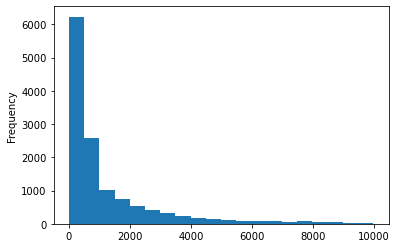

In [12]:
unique_df[unique_df.Claim_Cost<10000].Claim_Cost.plot.hist(bins=20)

### Claim Cost by year

In [13]:
df_claim_year= unique_df[['Claim_Cost','Injury_Year']]
df_claim_csv= df_claim_year.groupby(by=['Injury_Year']).describe()
df_claim_csv

Claim_Cost                                                     \
                 count         mean           std  min       25%      50%   
Injury_Year                                                                 
18              6940.0  3262.778159  11862.456333  0.0  265.6250  584.185   
19              7130.0  3506.634606  14379.235214  0.0  271.8475  593.845   

                                   
                   75%        max  
Injury_Year                        
18           1967.2475  475562.01  
19           1999.3400  692147.78

### Clean Injury Cause Colum

### Step1) Replace NAN or missing value with 'Miscellaneous' as 'Misc'

In [14]:
unique_df['Injury_Cause_(injuries)'].fillna('Misc',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
unique_df

,Claim_Number,Claim_Cost,Injury_Cause_(injuries),Gender,Injured_Worker_Age,Injured_Worker_Experience,Injury_Date,Injured_Work_Job_Group,Injury_Month,Injury_Day,Injury_Year
0,ClaimNumber9999,473.76,Strain,M,41,0,10/28/19,FOOD SERVICE,10,28,19
1,ClaimNumber9998,312.30,Burn,M,38,5,4/27/18,FOOD SERVICE,4,27,18
2,ClaimNumber9996,2294.99,Injury Caused by Person(s),F,44,2,9/19/19,PROFESSIONAL/CLERICAL/ADMIN,9,19,19
3,ClaimNumber9993,0.00,Fall/Slip,M,60,10,10/24/19,BUILDING MAINTENANCE,10,24,19
4,ClaimNumber999,0.00,Misc,F,62,0,6/6/19,FOOD SERVICE,6,6,19
...,...,...,...,...,...,...,...,...,...,...,...
14067,ClaimNumber10159.2,129.00,Misc,M,43,2,4/22/19,PROFESSIONAL/CLERICAL/ADMIN,4,22,19
14068,ClaimNumber10125.2,331.48,Struck,M,56,1,1/8/19,PROFESSIONAL/CLERICAL/ADMIN,1,8,19
14069,ClaimNumber10117.2,5105.99,Misc,F,45,10,4/26/19,PROFESSIONAL/CLERICAL/ADMIN,4,26,19
14070,ClaimNumber10091.2,957.44,Fall/Slip,F,44,1,6/1/18,PROFESSIONAL/CLERICAL/ADMIN,6,1,18


### Cleaning Gender

### Step1)Fill missing rows with 'U'
### Step2)Replace rows where 'FEMALE' is written with 'F' and 'MALE' with 'M'

In [16]:
unique_df[~unique_df.Gender.isin(['M','F'])]

,Claim_Number,Claim_Cost,Injury_Cause_(injuries),Gender,Injured_Worker_Age,Injured_Worker_Experience,Injury_Date,Injured_Work_Job_Group,Injury_Month,Injury_Day,Injury_Year
783,ClaimNumber8675,2100.08,Misc,NaN,28,NaN,12/2/19,FOOD SERVICE,12,2,19
1230,ClaimNumber7928,11101.61,Fall/Slip,NaN,44,5,2/22/19,PROFESSIONAL/CLERICAL/ADMIN,2,22,19
1415,ClaimNumber7608,605.14,Misc,NaN,55,NaN,12/18/18,CUSTODIAL,12,18,18
1980,ClaimNumber6650,35879.45,Strain,NaN,58,8,2/6/19,PROFESSIONAL/CLERICAL/ADMIN,2,6,19
3240,ClaimNumber4521,207.93,Misc,NaN,39,NaN,4/10/19,PROFESSIONAL/CLERICAL/ADMIN,4,10,19
5467,ClaimNumber23201,25862.15,Misc,U,49,2,12/19/19,PROFESSIONAL/CLERICAL/ADMIN,12,19,19
5676,ClaimNumber22847,968.93,Misc,NaN,53,NaN,9/23/19,PROFESSIONAL/CLERICAL/ADMIN,9,23,19
6541,ClaimNumber21386,22853.93,Fall/Slip,FEMALE,27,18,5/15/18,PROFESSIONAL/CLERICAL/ADMIN,5,15,18
8509,ClaimNumber18077,212.22,Misc,FEMALE,22,18,9/17/19,PROFESSIONAL/CLERICAL/ADMIN,9,17,19
9021,ClaimNumber17211,182.41,Strain,U,30,0,3/1/18,PROFESSIONAL/CLERICAL/ADMIN,3,1,18


In [18]:
unique_df.Gender = unique_df.Gender.fillna('U')
unique_df.Gender.replace({"FEMALE":"F","MALE":"M"},inplace=True)
unique_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Claim_Number,Claim_Cost,Injury_Cause_(injuries),Gender,Injured_Worker_Age,Injured_Worker_Experience,Injury_Date,Injured_Work_Job_Group,Injury_Month,Injury_Day,Injury_Year
0,ClaimNumber9999,473.76,Strain,M,41,0,10/28/19,FOOD SERVICE,10,28,19
1,ClaimNumber9998,312.30,Burn,M,38,5,4/27/18,FOOD SERVICE,4,27,18
2,ClaimNumber9996,2294.99,Injury Caused by Person(s),F,44,2,9/19/19,PROFESSIONAL/CLERICAL/ADMIN,9,19,19
3,ClaimNumber9993,0.00,Fall/Slip,M,60,10,10/24/19,BUILDING MAINTENANCE,10,24,19
4,ClaimNumber999,0.00,Misc,F,62,0,6/6/19,FOOD SERVICE,6,6,19
...,...,...,...,...,...,...,...,...,...,...,...
14067,ClaimNumber10159.2,129.00,Misc,M,43,2,4/22/19,PROFESSIONAL/CLERICAL/ADMIN,4,22,19
14068,ClaimNumber10125.2,331.48,Struck,M,56,1,1/8/19,PROFESSIONAL/CLERICAL/ADMIN,1,8,19
14069,ClaimNumber10117.2,5105.99,Misc,F,45,10,4/26/19,PROFESSIONAL/CLERICAL/ADMIN,4,26,19
14070,ClaimNumber10091.2,957.44,Fall/Slip,F,44,1,6/1/18,PROFESSIONAL/CLERICAL/ADMIN,6,1,18


### Cleaning Injured Worker Age

### Step1)Outliers were present in the dataset- Highest as '99999' and lowest age as '0','1','3'
### Step2)Set a limit on the minimum and maximum age 
### Step3)Converting non-numeric values to numeric like 'a','NULL'
### Step4)Splitting male age and female age and applying limits on the age
### Step5)Filling missing rows with mean age based on gender
### Step6)Mean age value for male and female are same, thus filled missing rows with mean value

In [19]:
MIN_AGE = 16
MAX_AGE = 100
unique_df.Injured_Worker_Age = pd.to_numeric(unique_df.Injured_Worker_Age,errors='coerce')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
male_age_df = unique_df[unique_df['Gender']=='M'][['Injured_Worker_Age']]
male_age_df = male_age_df[male_age_df>MIN_AGE]
male_age_df = male_age_df[male_age_df<MAX_AGE]
mean_above_min_age = male_age_df.mean()
male_age_df = male_age_df.fillna(mean_above_min_age)
male_age_df.describe()

,Injured_Worker_Age
count,3061.000000
mean,47.406230
std,12.639906
min,17.000000
25%,38.000000
50%,49.000000
75%,57.000000
max,85.000000


In [22]:
female_age_df = unique_df[unique_df['Gender']=='F'][['Injured_Worker_Age']]
female_age_df = female_age_df[female_age_df>MIN_AGE]
female_age_df = female_age_df[female_age_df<MAX_AGE]
mean_above_min_age_f = female_age_df.mean()
female_age_df = female_age_df.fillna(mean_above_min_age_f)
female_age_df.describe()

,Injured_Worker_Age
count,10996.000000
mean,47.502323
std,12.652424
min,17.000000
25%,38.000000
50%,49.000000
75%,57.000000
max,89.000000


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 0, 'Gender')

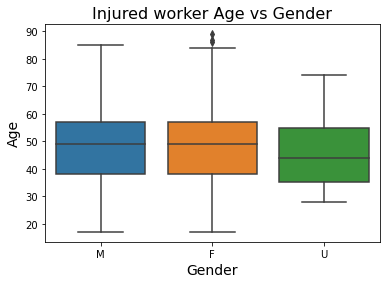

In [23]:
unique_df.Injured_Worker_Age = unique_df.Injured_Worker_Age.fillna(47)
unique_df = unique_df[unique_df.Injured_Worker_Age>MIN_AGE]
unique_df = unique_df[unique_df.Injured_Worker_Age<MAX_AGE]
ax = sns.boxplot(y='Injured_Worker_Age',x='Gender',data=unique_df);
ax.set_title("Injured worker Age vs Gender", fontsize=16)
ax.set_ylabel("Age", fontsize=14)
ax.set_xlabel("Gender", fontsize=14)

In [ ]:
unique_df.shape

In [24]:
unique_df

,Claim_Number,Claim_Cost,Injury_Cause_(injuries),Gender,Injured_Worker_Age,Injured_Worker_Experience,Injury_Date,Injured_Work_Job_Group,Injury_Month,Injury_Day,Injury_Year
0,ClaimNumber9999,473.76,Strain,M,41.0,0,10/28/19,FOOD SERVICE,10,28,19
1,ClaimNumber9998,312.30,Burn,M,38.0,5,4/27/18,FOOD SERVICE,4,27,18
2,ClaimNumber9996,2294.99,Injury Caused by Person(s),F,44.0,2,9/19/19,PROFESSIONAL/CLERICAL/ADMIN,9,19,19
3,ClaimNumber9993,0.00,Fall/Slip,M,60.0,10,10/24/19,BUILDING MAINTENANCE,10,24,19
4,ClaimNumber999,0.00,Misc,F,62.0,0,6/6/19,FOOD SERVICE,6,6,19
...,...,...,...,...,...,...,...,...,...,...,...
14067,ClaimNumber10159.2,129.00,Misc,M,43.0,2,4/22/19,PROFESSIONAL/CLERICAL/ADMIN,4,22,19
14068,ClaimNumber10125.2,331.48,Struck,M,56.0,1,1/8/19,PROFESSIONAL/CLERICAL/ADMIN,1,8,19
14069,ClaimNumber10117.2,5105.99,Misc,F,45.0,10,4/26/19,PROFESSIONAL/CLERICAL/ADMIN,4,26,19
14070,ClaimNumber10091.2,957.44,Fall/Slip,F,44.0,1,6/1/18,PROFESSIONAL/CLERICAL/ADMIN,6,1,18


### Cleaning Injured Worker Experience

### Step1)Converted non-numeric and coerced values to numeric like 'a', 'NULL'
### Step2)Fill missing rows with default value of '0' experience 
### Step3)Set limit on the Minimum and Maximum years of experience to remove the outliers like '999999','-1'

In [25]:
MIN_EXP = 0
MAX_EXP = 100
unique_df.Injured_Worker_Experience = pd.to_numeric(unique_df.Injured_Worker_Experience,errors='coerce')
unique_df.Injured_Worker_Experience = unique_df.Injured_Worker_Experience.fillna(0)
unique_df = unique_df[unique_df.Injured_Worker_Experience>=MIN_EXP]
unique_df = unique_df[unique_df.Injured_Worker_Experience<MAX_EXP]

<AxesSubplot:>

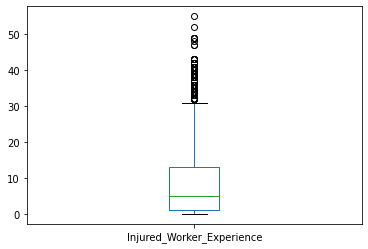

In [26]:
unique_df.Injured_Worker_Experience.plot.box()

In [31]:
unique_df

,Claim_Number,Claim_Cost,Injury_Cause_(injuries),Gender,Injured_Worker_Age,Injured_Worker_Experience,Injury_Date,Injured_Work_Job_Group,Injury_Month,Injury_Day,Injury_Year
0,ClaimNumber9999,473.76,Strain,M,41.0,0.0,10/28/19,FOOD SERVICE,10,28,19
1,ClaimNumber9998,312.30,Burn,M,38.0,5.0,4/27/18,FOOD SERVICE,4,27,18
2,ClaimNumber9996,2294.99,Injury Caused by Person(s),F,44.0,2.0,9/19/19,PROFESSIONAL/CLERICAL/ADMIN,9,19,19
3,ClaimNumber9993,0.00,Fall/Slip,M,60.0,10.0,10/24/19,BUILDING MAINTENANCE,10,24,19
4,ClaimNumber999,0.00,Misc,F,62.0,0.0,6/6/19,FOOD SERVICE,6,6,19
...,...,...,...,...,...,...,...,...,...,...,...
14067,ClaimNumber10159.2,129.00,Misc,M,43.0,2.0,4/22/19,PROFESSIONAL/CLERICAL/ADMIN,4,22,19
14068,ClaimNumber10125.2,331.48,Struck,M,56.0,1.0,1/8/19,PROFESSIONAL/CLERICAL/ADMIN,1,8,19
14069,ClaimNumber10117.2,5105.99,Misc,F,45.0,10.0,4/26/19,PROFESSIONAL/CLERICAL/ADMIN,4,26,19
14070,ClaimNumber10091.2,957.44,Fall/Slip,F,44.0,1.0,6/1/18,PROFESSIONAL/CLERICAL/ADMIN,6,1,18


### Writing dataframe into csv

In [32]:
unique_df.to_csv("cleaned_data_challenge.csv", index=0)

### Extra analysis to verify recommendations ###

In [28]:
df_by_month = unique_df[["Claim_Number","Injury_Month"]].groupby(by=["Injury_Month"])

In [29]:
df_by_month.count().sort_values(by="Claim_Number")

,Claim_Number
Injury_Month,
7,417
6,510
12,1000
1,1104
3,1114
11,1257
8,1262
2,1340
4,1406


In [30]:
df_by_cause = unique_df[["Claim_Number","Injury_Month", "Injury_Cause_(injuries)"]].groupby(by=["Injury_Cause_(injuries)"])

In [33]:
unique_df.Claim_Cost.max()

692147.78

In [34]:
unique_df_group = unique_df[['Injured_Worker_Age','Injured_Worker_Experience']]

In [35]:
unique_df_group

,Injured_Worker_Age,Injured_Worker_Experience
0,41.0,0.0
1,38.0,5.0
2,44.0,2.0
3,60.0,10.0
4,62.0,0.0
...,...,...
14067,43.0,2.0
14068,56.0,1.0
14069,45.0,10.0
14070,44.0,1.0


In [36]:
unique_df_group.corr()

,Injured_Worker_Age,Injured_Worker_Experience
Injured_Worker_Age,1.000000,-0.004864
Injured_Worker_Experience,-0.004864,1.000000


In [37]:
unique_df_age_gender= unique_df[['Injured_Worker_Age','Gender']].groupby(by=["Gender"])

In [38]:
unique_df_age_gender.describe()

Injured_Worker_Age                                                    
                    count       mean        std   min   25%   50%   75%   max
Gender                                                                       
F                 10985.0  47.502412  12.658565  17.0  38.0  49.0  57.0  89.0
M                  3055.0  47.398036  12.649861  17.0  38.0  49.0  57.0  85.0
U                    13.0  47.000000  15.302505  28.0  35.0  44.0  55.0  74.0